## Project Title: Predict Taxi Trip duration
#### Project Completed by: Anubha Sharma
#### Under Capabl Data Science Summer Internship

### Step1: Import the necessary Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

## Step2: Load the training and test data

In [3]:
train_data=pd.read_csv("train.csv",parse_dates=["pickup_datetime" ,"dropoff_datetime"])
train_data.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
test_data=pd.read_csv("test.csv",parse_dates=['pickup_datetime'])
test_data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


## Step3: Data Exploration

In [5]:
def _create_summary_table(train_data):
    summary_table = pd.DataFrame(index =train_data.columns)
    summary_table['types'] = train_data.dtypes
    summary_table['unique_values'] = train_data.apply(lambda col: len(col.unique()))
    summary_table['pct_unique_value']= summary_table['unique_values'] / train_data.shape[0]
    summary_table['nan_values'] = train_data.apply(lambda col: col.isna().sum())
    stats=train_data.describe(include='all').T
    required_columns= ['min','max','mean','std']
    summary_table[required_columns]=stats[required_columns]

    return summary_table

### Data Exploration of Train Data

In [6]:
_create_summary_table(train_data)

,types,unique_values,pct_unique_value,nan_values,min,max,mean,std
id,object,1458644,1.000000,0,NaN,NaN,NaN,NaN
vendor_id,int64,2,0.000001,0,1.0,2.0,1.53495,0.498777
pickup_datetime,datetime64[ns],1380222,0.946236,0,2016-01-01 00:00:17,2016-06-30 23:59:39,2016-04-01 10:10:24.940037120,NaN
dropoff_datetime,datetime64[ns],1380377,0.946343,0,2016-01-01 00:03:31,2016-07-01 23:02:03,2016-04-01 10:26:24.432310528,NaN
passenger_count,int64,10,0.000007,0,0.0,9.0,1.66453,1.314242
pickup_longitude,float64,23047,0.015800,0,-121.933342,-61.335529,-73.973486,0.070902
pickup_latitude,float64,45245,0.031019,0,34.359695,51.881084,40.750921,0.032881
dropoff_longitude,float64,33821,0.023187,0,-121.933304,-61.335529,-73.973416,0.070643
dropoff_latitude,float64,62519,0.042861,0,32.181141,43.921028,40.7518,0.035891
store_and_fwd_flag,object,2,0.000001,0,NaN,NaN,NaN,NaN


### Data Exploration of Test Data

In [7]:
_create_summary_table(test_data)

,types,unique_values,pct_unique_value,nan_values,min,max,mean,std
id,object,625134,1.000000,0,NaN,NaN,NaN,NaN
vendor_id,int64,2,0.000003,0,1.0,2.0,1.534884,0.498782
pickup_datetime,datetime64[ns],610581,0.976720,0,2016-01-01 00:00:22,2016-06-30 23:59:58,2016-04-01 13:27:01.567467264,NaN
passenger_count,int64,8,0.000013,0,0.0,9.0,1.661765,1.311293
pickup_longitude,float64,18926,0.030275,0,-121.933128,-69.248917,-73.973614,0.073389
pickup_latitude,float64,38408,0.061440,0,37.389587,42.814938,40.750927,0.029848
dropoff_longitude,float64,26476,0.042353,0,-121.933327,-67.496796,-73.973458,0.072565
dropoff_latitude,float64,51439,0.082285,0,36.601322,48.857597,40.751816,0.035824
store_and_fwd_flag,object,2,0.000003,0,NaN,NaN,NaN,NaN


## Step4: Exploratory Data Analysis

Text(0.5, 1.0, 'Dropoff Longitude vs Trip Duration')

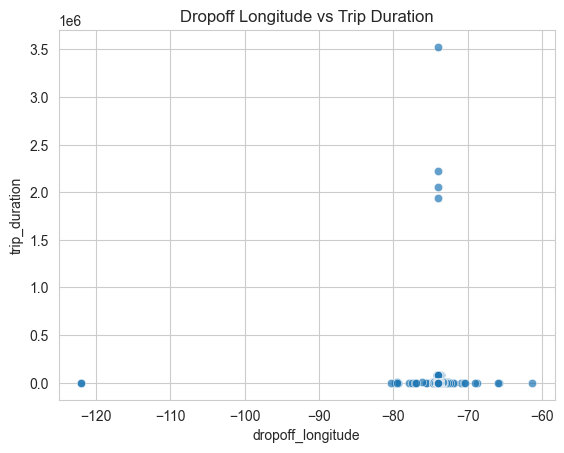

In [8]:
sns.scatterplot(data=train_data,
               x='dropoff_longitude',
               y='trip_duration',
               alpha=0.7);
plt.title('Dropoff Longitude vs Trip Duration')

<Axes: xlabel='passenger_count', ylabel='trip_duration'>

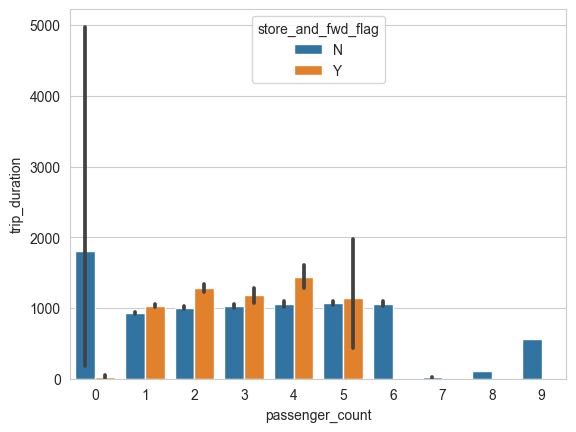

In [9]:
sns.barplot(x='passenger_count', y='trip_duration', hue='store_and_fwd_flag', data = train_data)

Text(0.5, 0, 'Month of the year')

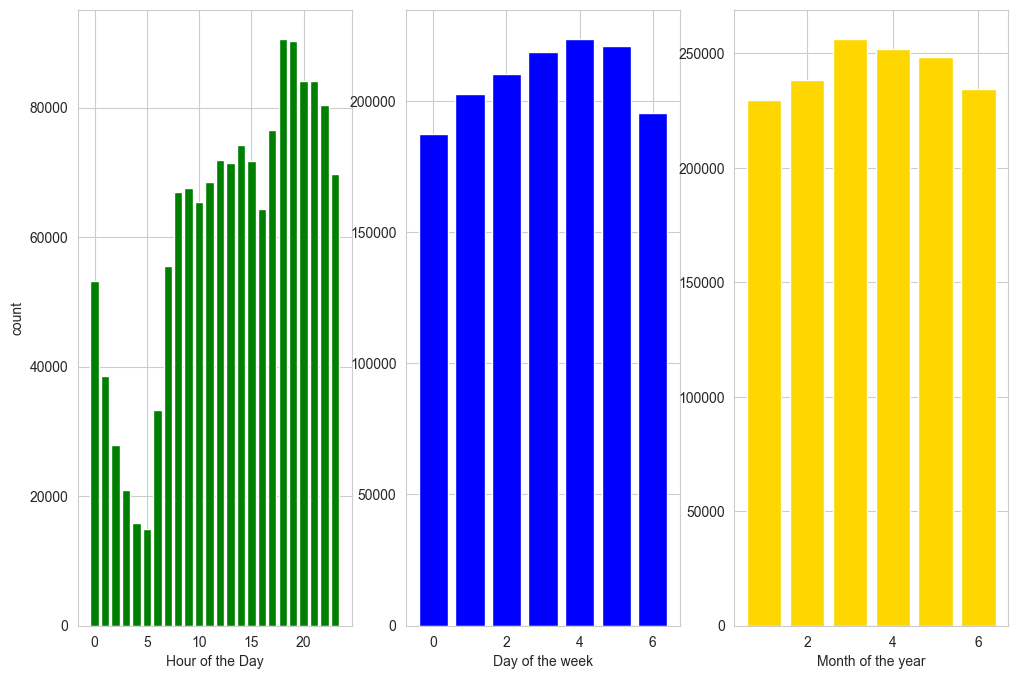

In [10]:
fig,  (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(12,8))
hourly_count = train_data.groupby(train_data['pickup_datetime'].dt.hour).trip_duration.count().reset_index()
weekly_count = train_data.groupby(train_data['pickup_datetime'].dt.dayofweek).trip_duration.count().reset_index()
monthly_count=train_data.groupby(train_data['pickup_datetime'].dt.to_period('M')).trip_duration.count().reset_index()

ax1.set_ylabel('count')
ax1.set_xlabel('Hour of the Day')
ax1.bar(x =hourly_count.pickup_datetime ,height = hourly_count.trip_duration,color='green')

ax2.set_xlabel('Day of the week')
ax2.bar(x =weekly_count.pickup_datetime ,height = weekly_count.trip_duration,color='blue')

ax3.bar(x =monthly_count.pickup_datetime.dt.month ,height = monthly_count.trip_duration,color='gold')
ax3.set_xlabel('Month of the year')

## Step5: Data Preprocessing

### Data Labeling and MinMaxScaler

In [11]:
train_data=train_data.drop(['dropoff_datetime'], axis=1)

### Label Encoding of Train Data

In [12]:
lc=LabelEncoder()
train_data['id']=lc.fit_transform(train_data['id'])
train_data['store_and_fwd_flag']=lc.fit_transform(train_data['store_and_fwd_flag'])
train_data['vendor_id']=lc.fit_transform(train_data['vendor_id'])
train_data['pickup_datetime']=lc.fit_transform(train_data['pickup_datetime'])

### Label Encoding of Test Data

In [13]:
test_data['id']=lc.fit_transform(test_data['id'])
test_data['store_and_fwd_flag']=lc.fit_transform(test_data['store_and_fwd_flag'])
test_data['vendor_id']=lc.fit_transform(test_data['vendor_id'])
test_data['pickup_datetime']=lc.fit_transform(test_data['pickup_datetime'])

### Heat Map

<Axes: >

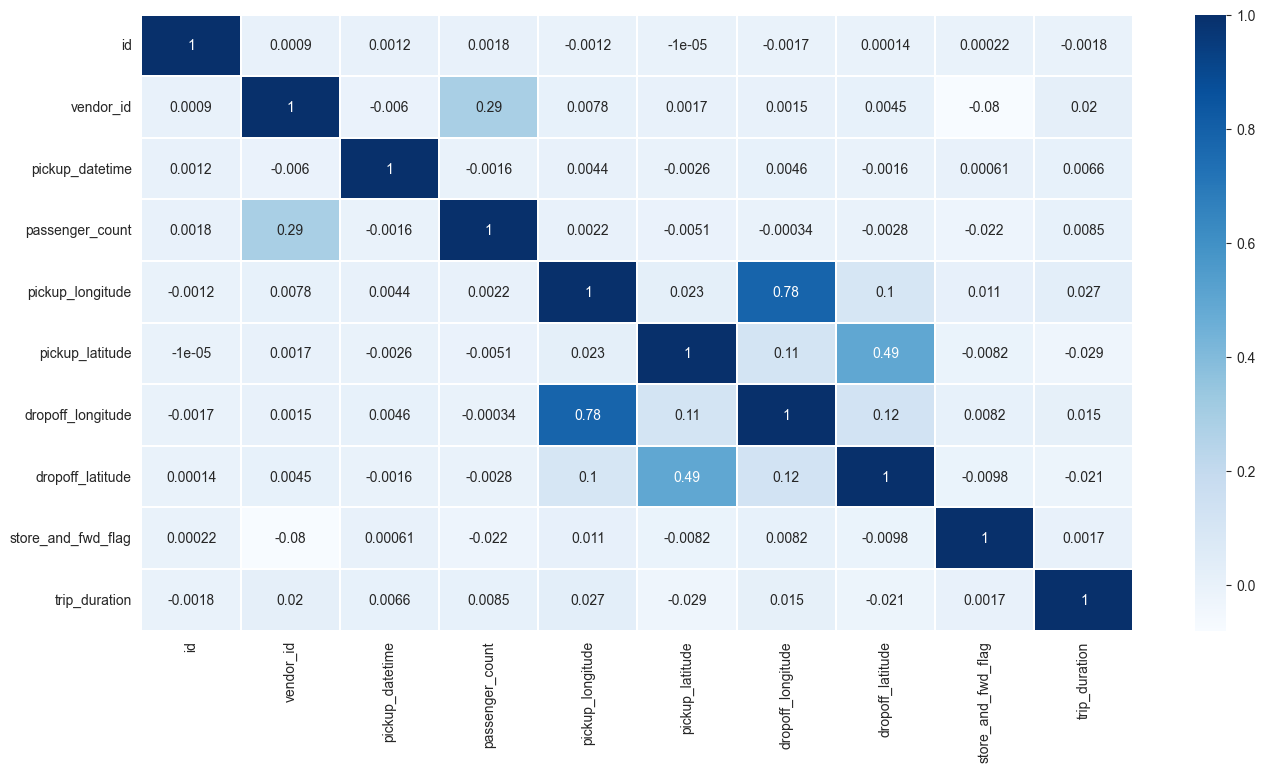

In [14]:
fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(train_data.corr(), cmap='Blues', annot=True, linewidth=.1, ax=ax)

In [18]:
scaler=MinMaxScaler()
train_data= scaler.fit_transform(train_data)
test_data=scaler.fit_transform(test_data)

In [20]:
train_data=pd.DataFrame(train_data)
train_data.head()

,0,1,2,3,4,5,6,7,8,9
0,0.719261,1.0,0.399702,0.111111,0.791302,0.365738,0.791591,0.731222,0.0,0.000129
1,0.594837,0.0,0.900372,0.111111,0.791331,0.364062,0.791016,0.728287,0.0,0.000188
2,0.964526,1.0,0.096289,0.111111,0.791354,0.365510,0.790920,0.726493,0.0,0.000602
3,0.876300,1.0,0.529575,0.111111,0.790842,0.363001,0.790805,0.726206,0.0,0.000121
4,0.545776,1.0,0.466473,0.111111,0.791452,0.367181,0.791454,0.732663,0.0,0.000123


In [21]:
test_data=pd.DataFrame(test_data)
test_data.head()

,0,1,2,3,4,5,6,7,8
0,0.750823,0.0,1.000000,0.111111,0.910045,0.616078,0.880717,0.339039,0.0
1,0.876007,0.0,0.999998,0.111111,0.910499,0.606487,0.881274,0.330776,0.0
2,0.304106,0.0,0.999997,0.111111,0.909868,0.617102,0.880790,0.336823,0.0
3,0.536659,1.0,0.999995,0.111111,0.910653,0.623428,0.880785,0.336901,0.0
4,0.399129,0.0,0.999993,0.111111,0.910385,0.621506,0.881243,0.338975,0.0


## Step6: Model Building

In [22]:
#6.1 Spliting Data into Training and Test Dataset
X=train_data.drop([9], axis=1)
y=train_data[9]
print(X.head())
y.head()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

          0    1         2         3         4         5         6         7  \
0  0.719261  1.0  0.399702  0.111111  0.791302  0.365738  0.791591  0.731222   
1  0.594837  0.0  0.900372  0.111111  0.791331  0.364062  0.791016  0.728287   
2  0.964526  1.0  0.096289  0.111111  0.791354  0.365510  0.790920  0.726493   
3  0.876300  1.0  0.529575  0.111111  0.790842  0.363001  0.790805  0.726206   
4  0.545776  1.0  0.466473  0.111111  0.791452  0.367181  0.791454  0.732663   

     8  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  


In [24]:
#6.2 Using the Regression Model
lr=LinearRegression()
#6.3 Fitting the Model
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
#6.4 Making the required Predictions
y_pred=lr.predict(X_test)
y_pred.reshape(-1,1)

array([[0.00031794],
       [0.00024339],
       [0.00018892],
       ...,
       [0.00023627],
       [0.00040255],
       [0.0002016 ]])

In [26]:
#6.5 Evaluting the Model
mse=mean_squared_error(y_test,y_pred)
print('The Mean Squared Error is ',mse)
mae=mean_absolute_error(y_test,y_pred)
print('The Mean Absolute Error is ',mae)
r2=r2_score(y_test,y_pred)
print('The R2 Score is ',r2)

The Mean Squared Error is  3.300680858524346e-06
The Mean Absolute Error is  0.00017374425742797337
The R2 Score is  0.001467080255781572


## Making Predictions on the Test Data

In [27]:
#Making the Predictions on Test data
test_prediction=lr.predict(test_data)

In [31]:
test_data['Predictions']=test_prediction
test_data

,0,1,2,3,4,5,6,7,8,Predictions
0,0.750823,0.0,1.000000,0.111111,0.910045,0.616078,0.880717,0.339039,0.0,0.001858
1,0.876007,0.0,0.999998,0.111111,0.910499,0.606487,0.881274,0.330776,0.0,0.002090
2,0.304106,0.0,0.999997,0.111111,0.909868,0.617102,0.880790,0.336823,0.0,0.001847
3,0.536659,1.0,0.999995,0.111111,0.910653,0.623428,0.880785,0.336901,0.0,0.001824
4,0.399129,0.0,0.999993,0.111111,0.910385,0.621506,0.881243,0.338975,0.0,0.001770
...,...,...,...,...,...,...,...,...,...,...
625129,0.751942,0.0,0.000007,0.111111,0.909754,0.614802,0.880513,0.337160,0.0,0.001844
625130,0.925398,0.0,0.000005,0.111111,0.909699,0.618245,0.881392,0.341143,0.0,0.001744
625131,0.642244,0.0,0.000003,0.222222,0.910346,0.621209,0.882803,0.338385,0.0,0.001721
625132,0.346013,0.0,0.000002,0.111111,0.910266,0.616361,0.883213,0.350063,0.0,0.001729
